In [3]:
import pandas as pd
!pip install feature_engine -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 2.5 MB/s eta 0:00:00


In [4]:
a=pd.read_csv('/content/train.csv')

In [ ]:
a.shape

(1460, 81)

In [5]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
a.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
b=pd.DataFrame(a.isnull().sum())

In [8]:
b

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [9]:
c1=['LotFrontage','MasVnrArea','GarageYrBlt']

In [10]:
c2=['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']


In [11]:
import feature_engine

In [12]:
from feature_engine.imputation import MeanMedianImputer

In [13]:
d=MeanMedianImputer(imputation_method='mean',
                    variables=['LotFrontage','MasVnrArea','GarageYrBlt'])

In [14]:
d.fit(a)

MeanMedianImputer(imputation_method='mean',
                  variables=['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])

In [15]:
d.imputer_dict_

{'LotFrontage': 70.04995836802665,
 'MasVnrArea': 103.68526170798899,
 'GarageYrBlt': 1978.5061638868744}

In [16]:
e=d.transform(a)

In [17]:
e.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [18]:
from feature_engine.imputation import CategoricalImputer

In [19]:
f=CategoricalImputer(imputation_method='missing',
                    variables=['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature'])

In [20]:
f.fit(e)

CategoricalImputer(variables=['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond',
                              'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                              'Electrical', 'FireplaceQu', 'GarageType',
                              'GarageFinish', 'GarageQual', 'GarageCond',
                              'PoolQC', 'Fence', 'MiscFeature'])

In [21]:
f.imputer_dict_

{'Alley': 'Missing',
 'MasVnrType': 'Missing',
 'BsmtQual': 'Missing',
 'BsmtCond': 'Missing',
 'BsmtExposure': 'Missing',
 'BsmtFinType1': 'Missing',
 'BsmtFinType2': 'Missing',
 'Electrical': 'Missing',
 'FireplaceQu': 'Missing',
 'GarageType': 'Missing',
 'GarageFinish': 'Missing',
 'GarageQual': 'Missing',
 'GarageCond': 'Missing',
 'PoolQC': 'Missing',
 'Fence': 'Missing',
 'MiscFeature': 'Missing'}

In [22]:
fc=f.transform(e)

In [23]:
fc

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,MnPrv,Missing,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,4,2010,WD,Normal,142125


In [24]:
fc1=pd.DataFrame(fc.isnull().sum())

In [25]:
fc1

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [27]:
import seaborn as sns

<Axes: xlabel='MSSubClass', ylabel='Count'>

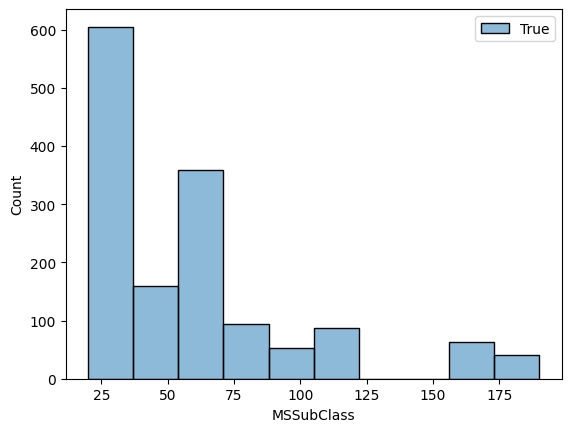

In [32]:
#univariate analysis
sns.histplot(data=fc,x="MSSubClass",hue=True,bins=10)

<Axes: xlabel='LotFrontage', ylabel='Count'>

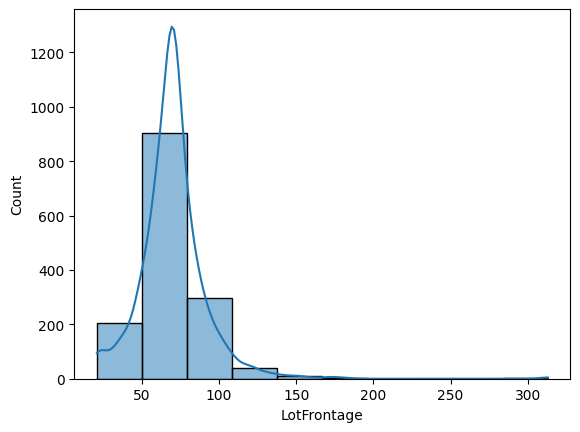

In [33]:
sns.histplot(data=fc,x="LotFrontage",kde=True,bins=10)

<Axes: xlabel='LotFrontage', ylabel='LotArea'>

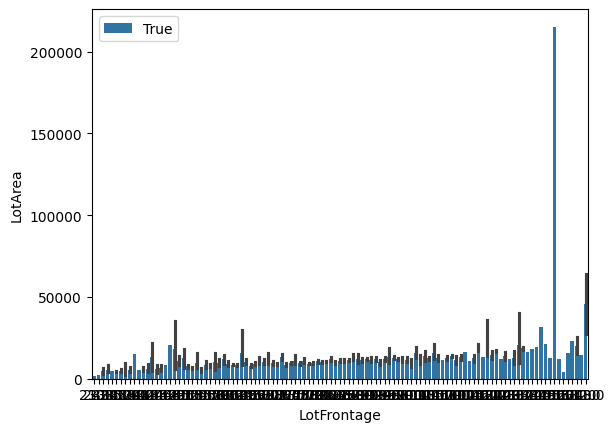

In [35]:
#bivariate analysis
sns.barplot(data=fc,x='LotFrontage',y='LotArea',hue=True)

<Axes: xlabel='LotFrontage', ylabel='MoSold'>

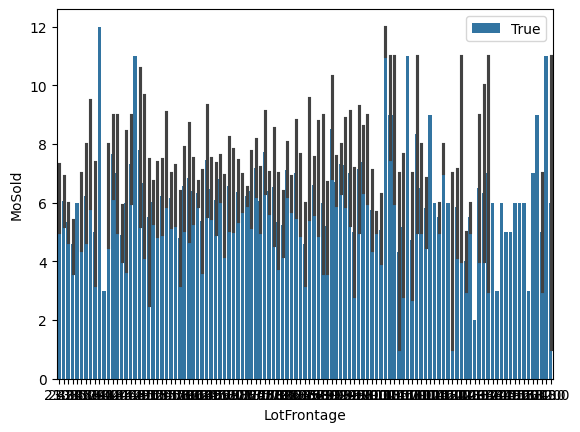

In [40]:
sns.barplot(data=fc,x='LotFrontage',y='MoSold',hue=True)

<Axes: xlabel='SalePrice', ylabel='Utilities'>

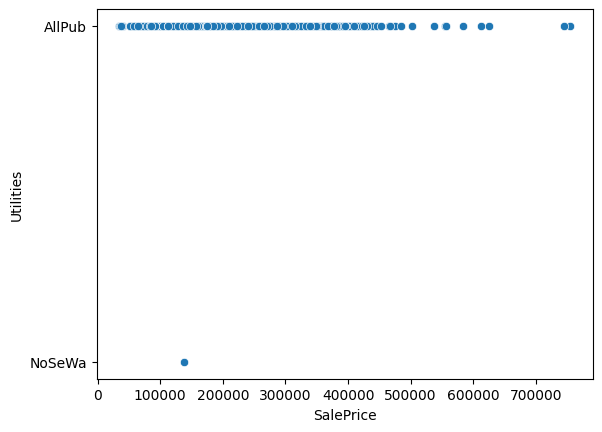

In [43]:
#categorical variables
sns.scatterplot(data=fc,x='SalePrice',y='Utilities')

<Axes: xlabel='SalePrice', ylabel='Utilities'>

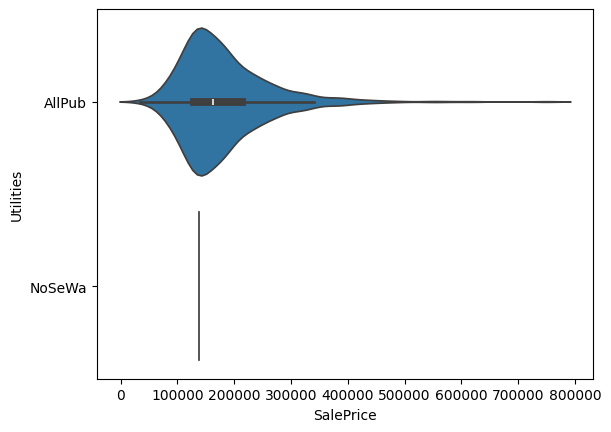

In [44]:
sns.violinplot(data=fc,x='SalePrice',y='Utilities')

<Axes: ylabel='count'>

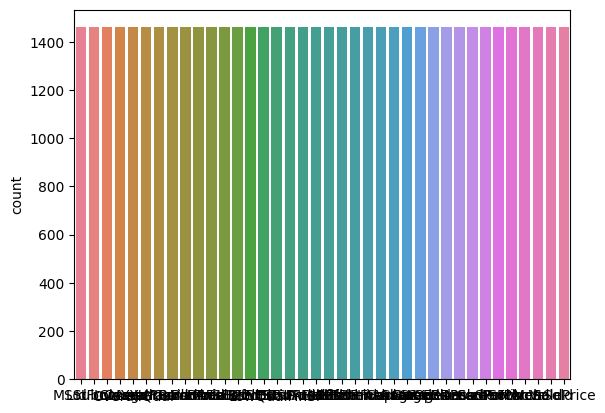

In [47]:
sns.countplot(data=fc)